# EDA: Chicago Food Inspections

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point, Polygon
from matplotlib.ticker import FuncFormatter

In [2]:
import sys
sys.path.append('../src/utils')

In [3]:
from utils_notebook.utils_eda import *

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
df_food = pd.read_csv('../data/Food_Inspections.csv')

In [6]:
df_food.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,08/26/2020,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


Generamos análisis primario para observar cómo se comporta la data Raw

In [7]:
count_data(df_food)

,tipo_dato,cantidad,nulos,unicos,moda,top1,f1,top2,f2,top3,f3
columnas,,,,,,,,,,,
Inspection ID,int64,215130,0,215130,valores unicos,2099201,1,1154712,1,2456387,1
DBA Name,object,215130,0,28753,SUBWAY,SUBWAY,2908,DUNKIN DONUTS,1578,MCDONALD'S,614
AKA Name,object,212643,2487,27360,SUBWAY,SUBWAY,3568,DUNKIN DONUTS,1586,7-ELEVEN,882
License #,float64,215113,17,39111,0.000000,0.000000,545,1354323.000000,198,14616.000000,176
Facility Type,object,210238,4892,500,Restaurant,Restaurant,143249,Grocery Store,28093,School,13206
Risk,object,215061,69,4,Risk 1 (High),Risk 1 (High),153869,Risk 2 (Medium),41978,Risk 3 (Low),19185
Address,object,215130,0,18525,11601 W TOUHY AVE,11601 W TOUHY AVE,2674,5700 S CICERO AVE,593,500 W MADISON ST,465
City,object,214972,158,70,CHICAGO,CHICAGO,214227,Chicago,347,chicago,111
State,object,215080,50,4,IL,IL,215077,WI,1,IN,1


None

 *********** Informacion global *************


analisis,columnas,datos,total_nulos,%_nulos,num_var,date_var,cat_var,str_var
informacion,17,215130,67303,31.28%,5,0,0,12


None


Haremos algunas trasformaciones a la estructura de los datos antes de generar el Data Profiling como cambiar los tipos de variables a sus correctos.



Como podemos observar en la tabla de arriba los nombres de las columnas contienen espacios en blanco y estan capitalizados aplicamos una normalización para hacer mas eficiente el trabajar mas tarde.

In [8]:
df_food = clean_column(df_food)

In [9]:
df_food.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_#', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')

Observamos que las columnas inspection_date es del tipo String en formato mm/dd/aaaa y que no tienen valores nulos antes de hacer la conversión a tipo Date hacemos una comprobación de que todos los registros cumplan con este formato.

In [10]:
listFecha = ["inspection_date"]
date_format = "mm/dd/aaaa"

In [11]:
checkDateForm(df_food, listFecha, date_format)

mm/dd/aaaa

Cantidad de valores en inspection_date que no cumplen con el formato mm/dd/aaaa : 0
Distribucion de valores:
 Series([], Name: 0, dtype: int64)


Todas cumplen con ese formato ahora cambiaremos el tipo a datetime para su correcto manejo.

In [12]:
type_format = '%m/%d/%Y'

In [13]:
changeType_date(df_food,listFecha, type_format)

Comprobamos que los cambios se hayan realizado

In [14]:
df_food.dtypes

inspection_id               int64
dba_name                   object
aka_name                   object
license_#                 float64
facility_type              object
risk                       object
address                    object
city                       object
state                      object
zip                       float64
inspection_date    datetime64[ns]
inspection_type            object
results                    object
violations                 object
latitude                  float64
longitude                 float64
location                   object
dtype: object

In [15]:
df_food.inspection_date.head()

0   2021-01-07
1   2020-10-20
2   2020-08-28
3   2020-08-27
4   2020-08-26
Name: inspection_date, dtype: datetime64[ns]

Obtenemos las variables con las que trabajaremos el Data profiling.

In [16]:
dicVar = getVariables(df_food)

In [17]:
dicVar

{'num_var': (5,
  array(['inspection_id', 'license_#', 'zip', 'latitude', 'longitude'],
        dtype=object)),
 'date_var': (1, array(['inspection_date'], dtype=object)),
 'cat_var': (0, array([], dtype=object)),
 'str_var': (11,
  array(['dba_name', 'aka_name', 'facility_type', 'risk', 'address', 'city',
         'state', 'inspection_type', 'results', 'violations', 'location'],
        dtype=object))}

Notamos entonces que de nuestras 17 variables iniciales:
+ 5 son variables numéricas
    + inspection_id, license_#, zip, latitude, longitude
+ 1 es una variable de fecha
    + inspection_date
+ 11 son variables de tipo string
    + dba_name, aka_name, facility_type, risk, address, city, state, inspection_type, results, violations, location

## Data Profiling 

### Variables Categóricas

In [18]:
data_profiling_categ(df_food,dicVar['str_var'][1])

metrica,dba_name,aka_name,facility_type,risk,address,city,state,inspection_type,results,violations,location
registros,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130
nulos,0,2487,4892,69,0,158,50,1,0,57447,710
Num_categorias,28753,27360,500,4,18525,70,4,110,7,156734,17248
categorias,"[PHILZ COFFEE, BIAN, JIN JU, LA BIZNAGA #2, MC...","[PHILZ COFFEE, BIAN, JIN JU, LA BIZNAGA #2, MC...","[nan, Restaurant, GENERAL STORE, Children's Se...","[Risk 2 (Medium), Risk 1 (High), Risk 3 (Low),...","[1555 N WELLS ST , 600 W CHICAGO AVE , 5203 N ...","[CHICAGO, Chicago, SCHAUMBURG, ELMHURST, CHICA...","[IL, nan, NY, IN, WI]","[License, Canvass, Complaint, Short Form Compl...","[Not Ready, Pass, No Entry, Out of Business, F...","[nan, 3. MANAGEMENT, FOOD EMPLOYEE AND CONDITI...","[(-87.63455069145124, 41.910736031820235), (-8..."
moda,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(-87.91442843927047, 42.008536400868735)"
top1,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(-87.91442843927047, 42.008536400868735)"
f1,2908,3568,143249,153869,2674,214227,215077,114250,112641,11,2691
top2,DUNKIN DONUTS,DUNKIN DONUTS,Grocery Store,Risk 2 (Medium),5700 S CICERO AVE,Chicago,WI,License,Fail,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,"(-87.74164564419637, 41.789329323265385)"
f2,1578,1586,28093,41978,593,347,1,28302,41527,10,593
top3,MCDONALD'S,7-ELEVEN,School,Risk 3 (Low),500 W MADISON ST,chicago,IN,Canvass Re-Inspection,Pass w/ Conditions,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...","(-87.64111966683218, 41.884187507127805)"


En la tabla anterior se comienzan a ver algunos comportamientos interesantes de los datos, como que Chicago se está escrito de distintas maneras, que hay establecimientos fuera del estado de Illinois y que establecimientos de cadenas de comida rápida parecen ser los que reciben un mayor número de inspecciones.

### Variables Numéricas

In [19]:
data_profiling_num(df_food,dicVar['num_var'][1])

metricas,inspection_id,license_#,zip,latitude,longitude
registros,215130,215113,215078,214420,214420
nulos,0,17,52,710,710
unicos,215130,39111,112,17248,17248
moda,valores unicos,0.000000,60614.000000,42.008536,-87.914428
min,44247.000000,0.000000,10014.000000,41.644670,-87.914428
max,2472776.000000,9999999.000000,60827.000000,42.021064,-87.525094
mean,1528869.843169,1630342.368829,60628.759227,41.880910,-87.676426
stdv,661474.231078,902765.321212,116.778081,0.081026,0.058527
25%,1188711.250000,1247748.000000,60614.000000,41.832580,-87.707338
median,1528174.500000,1992224.000000,60625.000000,41.891893,-87.666420


De lo anterior se infiere que a cada inspección de corresponde un único identificador. Además, los registros y valores faltantes de longitud y latitud coinciden, lo que hace sentido.

### Variables de Fechas

In [20]:
data_profiling_date(df_food,dicVar['date_var'][1])

metricas,inspection_date
tipo dato,<class 'numpy.datetime64'>
registros,215130
nulos,0
unicos,2797
moda,0 2013-11-14 dtype: datetime64[ns]
fecha inicio,2010-01-04 00:00:00
fecha fin,2021-01-15 00:00:00
top1,2013-11-14 00:00:00
f1,185
top2,2016-09-13 00:00:00


La primera inspección que se tiene registrada corresponde al día 4 de enero de 2010 y l última es del 15 de enero 2021.

El día en el que se realizaron el mayor número de inspecciones fue el 14 de noviembre de 2013 con 185 inspecciones, seguido por el 13 de septiembre de 2016 con 149 inspecciones y el 29 de noviembre de 2016 con 145.

# GEDA

### Risk

In [21]:
riesgo = df_food.groupby(['risk'],as_index=False)['inspection_id'].count()\
                                .rename(columns={"inspection_id": 'registros'})

In [22]:
riesgo['proporcion'] = 100*riesgo['registros']/riesgo['registros'].sum()

In [23]:
riesgo

,risk,registros,proporcion
0,All,29,0.013485
1,Risk 1 (High),153869,71.546677
2,Risk 2 (Medium),41978,19.519113
3,Risk 3 (Low),19185,8.920725


/home/ivan/.pyenv/versions/3.7.4/envs/dpa/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


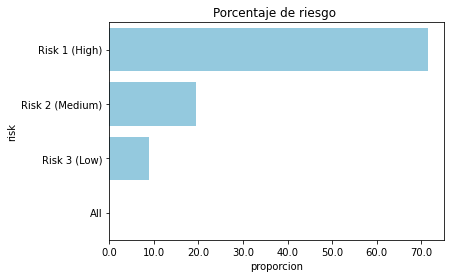

In [24]:
a = sns.barplot(x='proporcion',
                y='risk',
                data=riesgo.sort_values(by="proporcion", ascending=False),
                color="skyblue"
                )

a.set_title("Porcentaje de riesgo ")
a.set_xticklabels(a.get_xticklabels())
a.xaxis.set_major_formatter(FuncFormatter(number_formatter))

En esta gráfica se observa que aproximadamente el 71% de los establecimientos cuentan con un riesgo alto de afectar negativamente a la salud pública, el 20% de los establecimientos tienen un riesgo medio y el 9% tienen un riesgo bajo. Finalmente, notamos que 29 establecimientos están catalogados con riesgo "Todos"; analizando estos establecimientos notamos lo siguiente:

**Resultado:**

+ 13 no tenían resultado aún.
+ 6 de los establecimientos estaban fuera de servicio
+ 5 establecimientos no pasaron la inspección
+ 4 no se le dio entrada a los inspectores
+ 1 establecimiento no se ubicó.

**Tipo establecimiento:**

+ 8 establecimientos son restaurantes
+ 2 establecimientos son tiendas de abarrotes
+ de los 19 establecimientos restantes no se tiene información.

**Ciudad**

Los 29 establecimientos se ubican en la ciudad de Chicago.

**Violaciones**

No se tiene información del tipo de violación que cuenta cada establecimiento.

**Tipo de inspección**

+ 20 establecimientos son de tipo 'licencia'
+ 7 establecimientos de tipo 'sondeo'
+ 1 establecimiento de tipo 'queja'
+ 1 establecimiento tiene tipo de inspección 'propietario suspendio operación/licencia'

### Facility Type

In [25]:
establecimientos = df_food.groupby(['facility_type'],as_index=False)['inspection_id'].count()\
                    .rename(columns={"inspection_id": 'n'})

In [26]:
establecimientos = establecimientos[establecimientos['n']>=200].sort_values('n', ascending = True)

Tenemos 501 distintas categorías, seleccionaremos las categorías que tengan al menos 200 observaciones con ese Facility Type. 200 observaciones representan .09% del total de observaciones y considerando estos establecimientos tenemos 205667 observaciones que son aproximadamente el 95% del total de los datos.

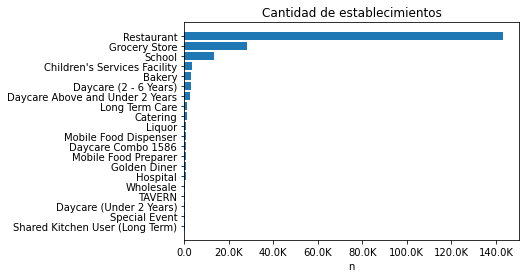

In [27]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(number_formatter)
ax.set_title('Cantidad de establecimientos')
plt.barh(establecimientos['facility_type'], establecimientos['n'])
ax.set_xlabel('n')
plt.show()

Los restaurantes tienen son los establecimientos con más observaciones, seguido de tiendas de abarrotes y escuelas, después de estas tres categorías las siguientes cuentan con un número relativamente pequeño de observaciones pero observamos establecimientos como panaderías, guarderías y banqueterías

### Results

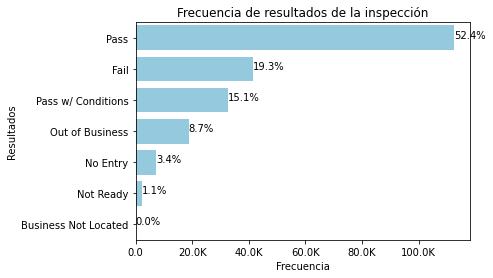

In [28]:
a = sns.countplot(y="results", data=df_food,
                  order = df_food['results'].value_counts().index, color="skyblue")
a.set_title("Frecuencia de resultados de la inspección")
a.set_ylabel("Resultados")
a.set_xlabel("Frecuencia")

total = len(df_food['results'])
for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(percentage, (x, y))
        
a.xaxis.set_major_formatter(FuncFormatter(number_formatter))
plt.show()

In [29]:
df_aux = df_food.copy()
df_aux.results.mask(df_aux.results == 'Pass w/ Conditions', 'Pass', inplace=True)

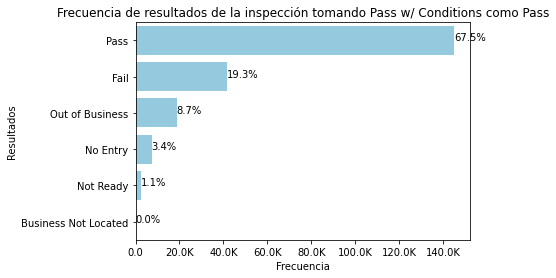

In [30]:
b = sns.countplot(y="results", data=df_aux,
                  order = df_aux['results'].value_counts().index, color="skyblue")
b.set_title("Frecuencia de resultados de la inspección tomando Pass w/ Conditions como Pass")
b.set_ylabel("Resultados")
b.set_xlabel("Frecuencia")

total = len(df_aux['results'])
for p in b.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        b.annotate(percentage, (x, y))

b.xaxis.set_major_formatter(FuncFormatter(number_formatter))
plt.show()

+ En esta columna no se encontró ningún valor faltante

+ En el ~67% de las inspecciones el establecimiento pasó la inspección, donde:
    + ~15% pasó la inspección condicionalmente
    + ~50% pasó la inspección satisfactoriamente
+ En el ~19% de las inspecciones el establecimiento reprobó la inspección.
+ ~9% de los establecimientos ya había cerrado al momento de la inspección.
+ ~3% de los establecimientos no presentan inspección por alguna razón
+ ~1% de los estableciemitnos no se encontraban listos para recibir la inspección
+ Mientras que muy pocos establciemientos ~0%, no fueron localizados y por lo tanto no se pudo realizar la inspección.

### Facility Type con Results

Tomaremos el top 10 de establecimientos de la variable *Facility Type* y observaremos los resultados de las inspecciones de estos.

In [45]:
facility_topten = df_food[df_food.facility_type.isin(df_food.facility_type.value_counts().index[0:10])]

In [46]:
df_t = facility_topten.groupby(['facility_type','results'],as_index=False)['inspection_id'].count()\
.rename(columns={"inspection_id": 'n'}).sort_values('n', ascending = False)

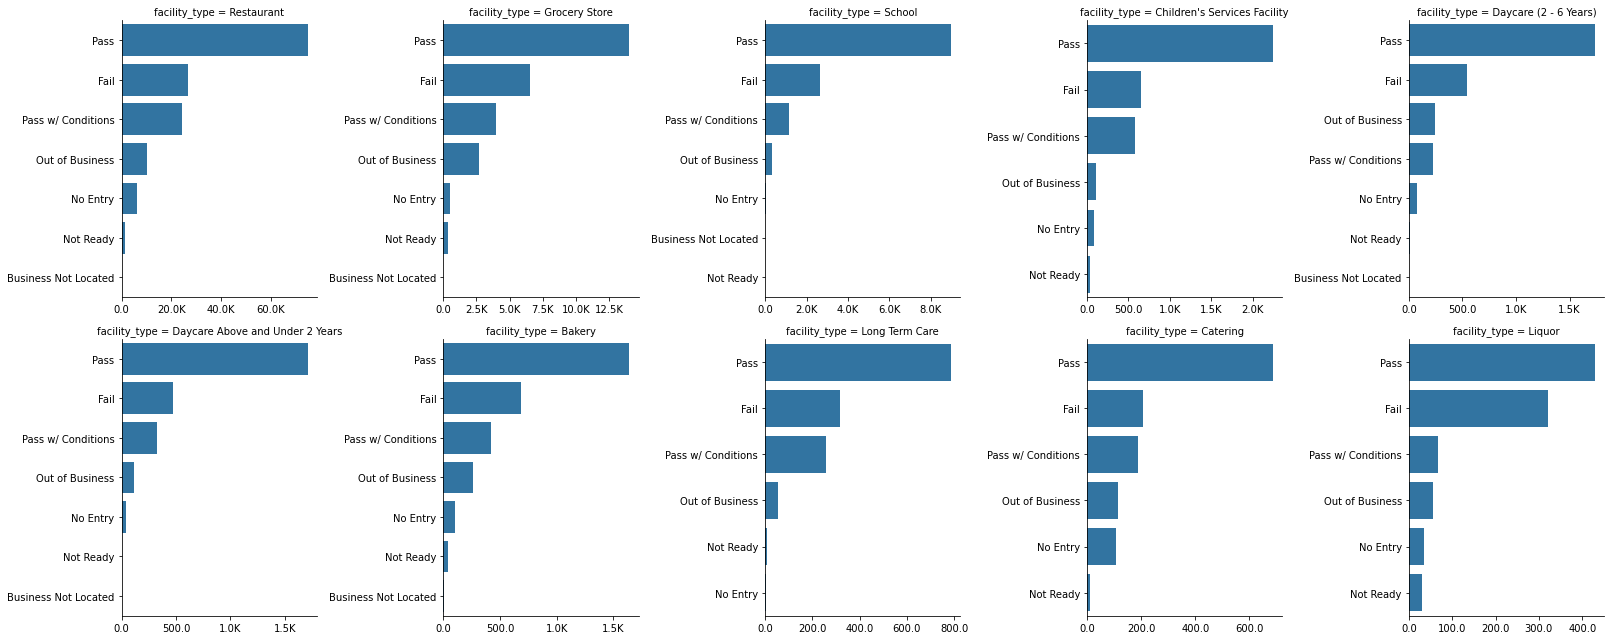

In [50]:
a = sns.FacetGrid(data=df_t, col="facility_type", col_wrap=5, sharex=False, sharey=False,
                 height=4.5)
a.map_dataframe(sns.barplot, x="n", y="results")

for ax in a.axes.flat:
    ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))


Hablando de proporciones, estos 10 establecimientos tienen un comportamiento similar, a excepción de *Liquor* que tiene más observaciones en la categoría *Fail* comparado con el resto. Además los establecimientos *Daycare* (2-6 Years) tienen más observaciones en *Out of Business* que en *Pass w/ Conditions*.

## Mapa

In [31]:
BBox = (df_food.longitude.min(),   df_food.longitude.max(),      
         df_food.latitude.min(), df_food.latitude.max())

In [32]:
BBox

(-87.91442843927047, -87.5250941359867, 41.64467013219805, 42.02106424782547)

In [33]:
mapa = gpd.read_file("Boundaries - City/geo_export_22821c4e-ea33-4fe3-9203-9a4af3afa017.shp")

In [34]:
crs = {'init': 'epsg:4326'}

In [35]:
geometry = [Point(xy) for xy in zip(df_food["longitude"], df_food["latitude"])]  
geometry[:3]

In [36]:
geo_df = gpd.GeoDataFrame(df_food, crs = crs, geometry = geometry)

/home/ivan/.pyenv/versions/3.7.4/envs/dpa/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


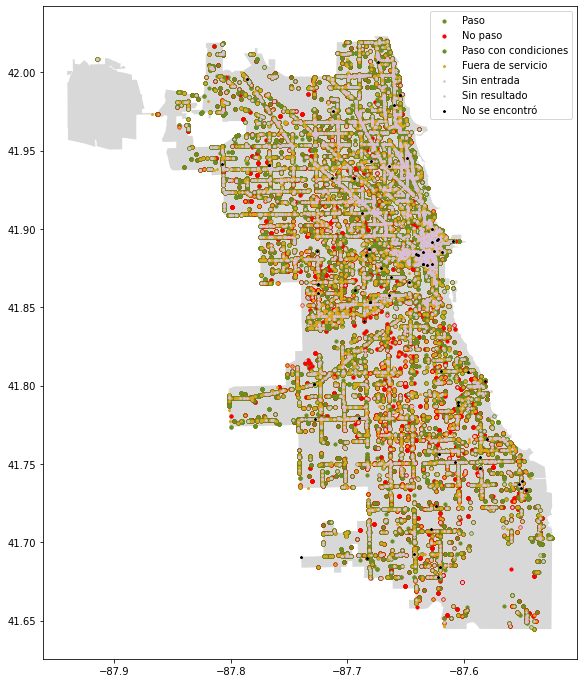

In [44]:
fig,ax = plt.subplots(figsize = (12,12))

mapa.plot(ax=ax, alpha = 0.3, color = "grey")
geo_df[geo_df['results']=='Pass'].plot(ax=ax, markersize=10, color="olivedrab", marker="o", label="Paso")
geo_df[geo_df['results']=='Fail'].plot(ax=ax, markersize=10, color="red", marker="o", label="No paso")
geo_df[geo_df['results']=='Pass w/ Conditions'].plot(ax=ax, markersize=10, color="olivedrab", marker="o", label="Paso con condiciones")
geo_df[geo_df['results']=='Out of Business'].plot(ax=ax, markersize=5, color="goldenrod", marker="*", label="Fuera de servicio")
geo_df[geo_df['results']=='No Entry'].plot(ax=ax, markersize=3, color="thistle", marker="*", label="Sin entrada")
geo_df[geo_df['results']=='Not Ready'].plot(ax=ax, markersize=3, color="thistle", marker="*", label="Sin resultado")
geo_df[geo_df['results']=='Business Not Located'].plot(ax=ax, markersize= 5, color="black", marker="*", label="No se encontró")

plt.legend(prop={'size': 10})

A simple vista, parece no haber una correlación entre la ubicación de los establecimientos y el hecho de si pasan o no la inspección.